In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import luminosity_analytic as l
import luminosity_numerical_no_SG as ln
import luminosity_numerical_SG as lsg
from utils.constants import G, kb, mp, Rb, Me, Re, Msun, RH, RHe, sigma, \
    cmperau, RHill, gammafn, mufn, Rfn, Cvfn, kdust, Tdisk, Pdisk, params, yr, kconst, kdust
from utils.parameters import FT, FSigma, mstar, Y, delad, rhoc, Mc, rc, \
    gamma, Y, a
import profiles_no_SG as atmnoSG
import profiles_SG as atmSG

import cooling as cool
from scipy.interpolate import interp1d
    
reload(l)
reload(ln)
#reload(atm)
reload(cool)

<module 'cooling' from 'cooling.pyc'>

In [83]:
delad = 2./7
a = 0.1
Mc = 10 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = Tdisk(a, FT), kappa = kdust)

In [84]:
model, param, prof = atmnoSG.atmload('a01Mc10', prms)
modelSG, paramSG, profSG = atmSG.atmload('a01Mc10', prms)

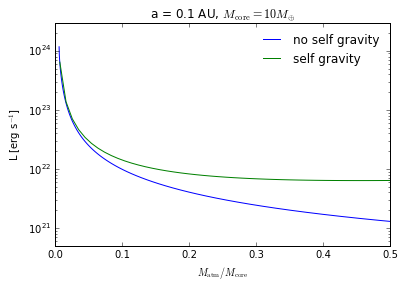

In [71]:
plt.semilogy((param.Mtot - model.Mco / Me) / (model.Mco/Me), param.L, label = 'no self gravity')
plt.semilogy((paramSG.MB - modelSG.Mco / Me) / (model.Mco/Me), paramSG.L, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)
plt.ylim(ymin=5e20, ymax = 3e24)
plt.title(r'a = 0.1 AU, $M_{\rm core}=10 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a01Mc10.pdf')

In [72]:
delad = 2./7
a = 60.0
Mc = 5 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = Tdisk(a, FT), kappa = kdust)

In [105]:
model, param, prof = atmnoSG.atmload('a60Mc5', prms)
modelSG, paramSG, profSG = atmSG.atmload('a60Mc5', prms)

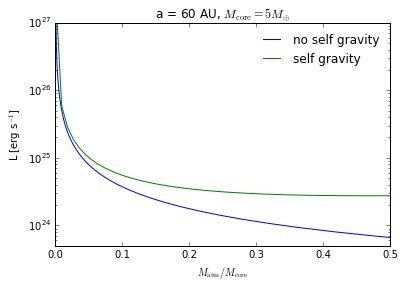

In [82]:
plt.semilogy((param.Mtot - model.Mco / Me) / (model.Mco/Me), param.L, label = 'no self gravity')
plt.semilogy((paramSG.MB - modelSG.Mco / Me) / (model.Mco/Me), paramSG.L, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)
plt.ylim(ymin=5e23, ymax = 1e27)
plt.title(r'a = 60 AU, $M_{\rm core}=5 M_{\oplus}$')

plt.savefig('../figs/L_vs_M_SG_a60Mc5.pdf')

In [109]:
dt = cool.cooling_global(param, prof, model, out='rcb')[0]
dtSG = cool.cooling_global(paramSG, profSG, modelSG, out='rcb')[0]

time = []
for i in range(len(dt)):
    time = np.append(time, sum(dt[:i + 1]))
    
dtSG = cool.cooling_global(paramSG, profSG, modelSG, out='rcb')[0]

timeSG = []
for i in range(len(dtSG)):
    timeSG = np.append(timeSG, sum(dtSG[:i + 1]))

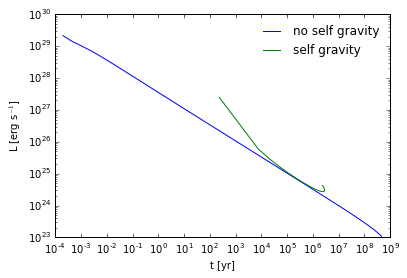

In [110]:
#plt.loglog(t / yr, L, label = 'analytic')
plt.loglog(time / yr, param.L[:-1], label = 'no self gravity')
plt.loglog(timeSG / yr, paramSG.L[:-1], label = 'self gravity')
#plt.xlim(xmin = 1e3, xmax = 1e8)
plt.legend(frameon = False)
plt.xlabel('t [yr]')
plt.ylabel(r'L [erg s$^{-1}$]')

#plt.savefig('../figs/comp_L_vs_t.pdf')

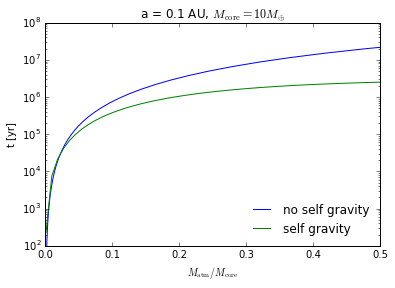

In [115]:
plt.semilogy((param.Mtot[:-1] - model.Mco / Me) / (model.Mco/Me), time/yr, label = 'no self gravity')
plt.semilogy((paramSG.MB[:-1] - modelSG.Mco / Me) / (model.Mco/Me), timeSG/yr, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r't [yr]')
plt.legend(frameon = False, loc = 4)
plt.ylim(ymin=1e2, ymax = 1e8)
plt.title(r'a = 60 AU, $M_{\rm core}=5 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a01Mc10.pdf')

In [25]:
prms2 = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kdust)

model2, param2, prof2 = atm.atmload('a01Mc10', prms2)

In [13]:
prms3 = params(Mc, rc, 5.0, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 60., kappa = kdust)

model3, param3, prof3 = atm.atmload('a5Mc10', prms3)

UnboundLocalError: local variable 'npzdat' referenced before assignment

In [28]:
c2 = cool.cooling_global(param2, prof2, model2, out = 'rcb')

In [305]:
c3 = cool.cooling_global(param3, prof3, model3, out = 'rcb')

In [306]:
c1 = cool.cooling_global(param, prof, model, out='rout')

In [307]:
cneg1 = cool.cooling_local(param, prof, model, out='rout', onlyrad = 1)

In [29]:
cneg2 = cool.cooling_local(param2, prof2, model2, out='rcb', onlyrad = 1)

In [30]:
cneg2 / (param2.Etotcb[1:]-param2.Etotcb[:-1])

array([-0.        ,  0.00784812,  0.0096285 ,  0.01116964,  0.01177573,
        0.01195222,  0.01275688,  0.01291042,  0.01302631,  0.01341022,
        0.01354856,  0.01396423,  0.01391616,  0.01426792,  0.01450241,
        0.01472937,  0.01494267,  0.01513748,  0.01564185,  0.01586534,
        0.0163636 ,  0.01660773,  0.01708601,  0.01774508,  0.01845184,
        0.01920532,  0.02000512,  0.02085045,  0.02174118,  0.02267713,
        0.02365755,  0.02468231,  0.02655338,  0.02859025,  0.02991112,
        0.03240191,  0.03523188,  0.03847367,  0.04229946,  0.04680869,
        0.05244058,  0.05958159,  0.06445678,  0.06183443,  0.0585479 ,
        0.05580465,  0.05290045,  0.05042333,  0.04804808])

In [31]:
dt2 = c2[0]
time2 = []
for i in range(len(dt2)):
    time2 = np.append(time2, sum(dt2[:i + 1]))

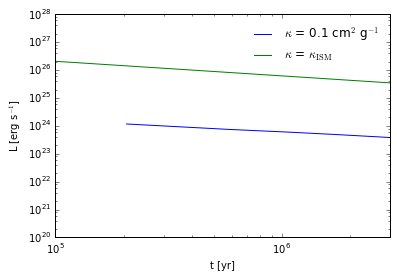

In [32]:
plt.loglog(time2 / yr, param2.L[:-1], label = r'$\kappa$ = 0.1 cm$^2$ g$^{-1}$')
plt.loglog(time / yr, param.L[:-1], label = r'$\kappa$ = $\kappa_{\rm ISM}$')
plt.xlim(xmin = 1e5, xmax = 3e6)
plt.legend(frameon = False)
plt.xlabel('t [yr]')
plt.ylabel(r'L [erg s$^{-1}$]')

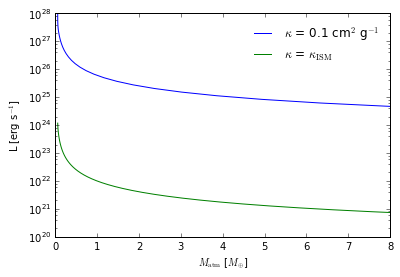

In [33]:
plt.semilogy(param.Mtot - model.Mco / Me, param.L, label = r'$\kappa$ = 0.1 cm$^2$ g$^{-1}$')
plt.semilogy(param2.Mtot - model2.Mco / Me, param2.L, label = r'$\kappa$ = $\kappa_{\rm ISM}$')
plt.xlim(xmax = 8)
plt.xlabel(r'$M_{\rm atm}$ [$M_{\oplus}$]')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)

#plt.savefig('../figs/comp_L_vs_M.pdf')

In [181]:
prmsPd10 = params(Mc, rc, 0.1, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT) * 1e-10, \
    Td = 1e3, kappa = kdust)

modelPd10, paramPd10, profPd10 = atm.atmload('a01Mc10Pd10', prmsPd10)
cPd10 = cool.cooling_global(paramPd10, profPd10, modelPd10, out = 'rout')

dtPd10 = cPd10[0]
timePd10 = []
for i in range(len(dtPd10)):
    timePd10 = np.append(timePd10, sum(dtPd10[:i + 1]))

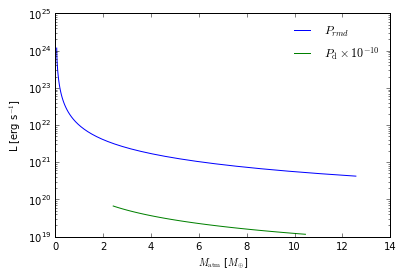

In [183]:
plt.semilogy(param2.Mtot - model2.Mco / Me, param2.L, label = r'$P_{rm d}$')
plt.semilogy(paramPd10.Mtot - modelPd10.Mco / Me, paramPd10.L, \
             label = r'$P_{\rm d} \times 10^{-10}$')
plt.xlabel(r'$M_{\rm atm}$ [$M_{\oplus}$]')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)

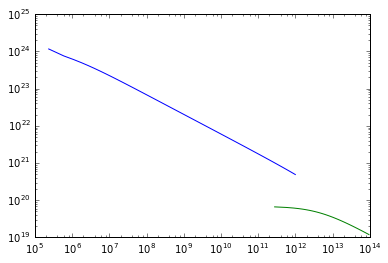

In [184]:
plt.loglog(time2 / yr, param2.L[:-1])
plt.loglog(timePd10 / yr, paramPd10.L[:-1])

In [340]:
sum(cool.cooling_global(param2, prof2, model2, out = 'rcb')[0][:-4])/yr/1e6

40.196910519647531

In [344]:
time2[-5]/1e6/yr

168.59083802521778

In [302]:
time2[-1]/yr/1e6

4796.3367417876516

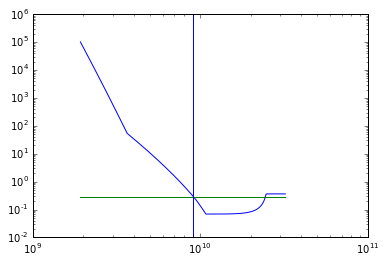

In [286]:
plt.loglog(prof2.r[20], prof2.delrad[30])
plt.loglog(prof2.r[20], np.ones(500) * 2./7)
plt.axvline(x = param2.rcb[30] * Re)

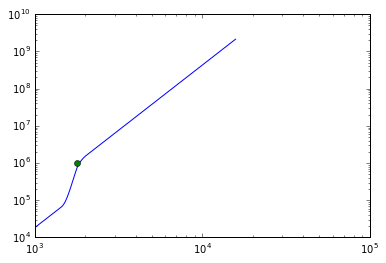

In [247]:
plt.loglog(prof2.t[20], prof2.P[20])
plt.plot(param2.Tcb[20], param2.Pcb[20], 'o')

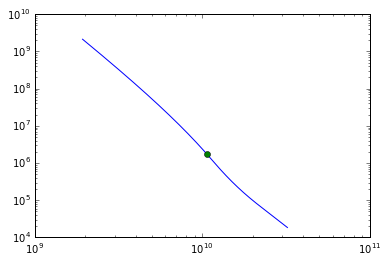

In [283]:
plt.loglog(prof2.r[20], prof2.P[20])
plt.plot(param2.rcb[20]*Re, param2.Pcb[20], 'o')

In [379]:
f = interp1d(time2 / yr, param2.Mtot[1:])
f(3e6)

array(10.953008497249893)

In [405]:
print param2.rcb[39], param2.rout[39]

12.5764957461 50.6079193827


In [401]:
print - G * model2.Mco * (param2.Mtot[39] * Me - model2.Mco) / (param2.rcb[39] * Re) + \
    model2.Cv * param2.Tcb[39] * param2.Mtot[39], param2.Etotout[39]

[ -2.95634208e+39] -2.6674960955e+39


In [398]:
f = interp1d(time / yr, param.Mtot[1:])
f(3e6)
print param.Mtot[42], time[42]/yr

11.8609049275 4687685.73493


In [402]:
print - G * model.Mco * (param.Mtot[42] * Me - model.Mco) / (param.rcb[42] * Re) + \
    model.Cv * param.Tcb[42] * param.Mtot[42], param.Etotout[42]

[ -1.37460759e+39] -5.48028950584e+39


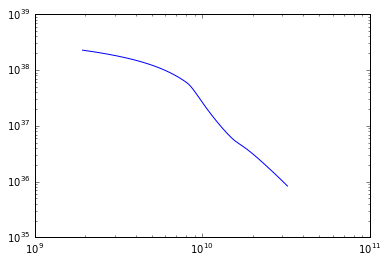

In [389]:
plt.loglog(prof2.r[39], - (- G * prof2.m[39] / prof2.r[39] + model2.Cv * prof2.t[39]) * \
           prof2.rho[39] * prof2.r[39]**3)

In [64]:
len(param.Mtot)

100

In [24]:
paramSG.Mtot, paramSG.MB, paramSG.L

(array([ 11.        ,  11.18585438,  11.37484892,  11.56703669,
         11.76247163,  11.96120862,  12.16330343,  12.36881281,
         12.57779445,  12.79030701,  13.00641015,  13.22616453,
         13.44963186,  13.67687485,  13.90795731,  14.14294411,
         14.3819012 ,  14.62489568,  14.87199576,  15.12327081,
         15.37879136,  15.63862915,  15.90285712,  16.17154944,
         16.44478156,  16.72263016,  17.00517325,  17.29249015,
         17.58466151,  17.88176935,  18.18389709,  18.49112953,
         18.80355293,  19.12125498,  19.44432488,  19.77285333,
         20.10693254,  20.4466563 ,  20.79211999,  21.14342058,
         21.50065669,  21.86392862,  22.23333833,  22.60898953,
         22.99098768,  23.37944001,  23.77445558,  24.17614528,
         24.58462186,  25.        ]),
 array([ 10.81620172,  10.99895467,  11.18480262,  11.37379979,
         11.5659973 ,  11.7614526 ,  11.96022002,  12.16235464,
         12.36791865,  12.57696619,  12.7895587 ,  13.00575832,
  

In [104]:
param.rcb/param.rout

array([ 1.        ,  0.84175503,  0.7910481 ,  0.75184106,  0.72269517,
        0.69861394,  0.67533513,  0.66024847,  0.64186321,  0.6275243 ,
        0.61350571,  0.5998003 ,  0.58972254,  0.57654842,  0.56686134,
        0.55733701,  0.54797271,  0.54181742,  0.53271388,  0.52376329,
        0.51787994,  0.5091786 ,  0.50345907,  0.49500002,  0.48943976,
        0.48394196,  0.47850592,  0.47313094,  0.46518146,  0.45995615,
        0.45478953,  0.44968095,  0.44462975,  0.4396353 ,  0.43715915,
        0.43224861,  0.42739323,  0.42259238,  0.41784547,  0.41315188,
        0.41082489,  0.40621016,  0.40164726,  0.39938507,  0.39489884,
        0.390463  ,  0.3882638 ,  0.3839025 ,  0.38174025,  0.37745222,
        0.37321236,  0.37111032,  0.3669417 ,  0.36487498,  0.36077639,
        0.3587444 ,  0.35471468,  0.35271682,  0.35073022,  0.34679053,
        0.3448373 ,  0.3409638 ,  0.33904339,  0.33713381,  0.33334683,
        0.33146933,  0.3296024 ,  0.32590003,  0.32406447,  0.32